# mumax 3.10 examples

In [1]:
import mumaxpy
import numpy as np
import matplotlib.pyplot as plt

mm = mumaxpy.Mumax()

NVIDIA GeForce GTX 980 Ti(6082MB), CUDA Driver 11.4, cc=5.2
//output directory: /home/magsim1/wills_mumax_stuff/mumaxpy/examples/mumax.out/


### Getting started with Standard Problem #4

Let's start with the classic mumag standard problem 4, as defined [here](https://www.ctcms.nist.gov/~rdm/mumag.org.html).

In [2]:
mm.Reset()
mm.SetGridSize(128, 32, 1)
mm.SetCellSize(500e-9/128, 125e-9/32, 3e-9)

mm.Msat = 800e3
mm.Aex = 13e-12
mm.alpha = 0.02

mm.m = mm.Uniform(1, .1, 0)
mm.Relax()
mm.Save(mm.m)

mm.AutoSave(mm.m, 200e-12)
mm.TableAutoSave(10e-12)

mm.B_ext = [-24.6E-3, 4.3E-3, 0]
mm.Run(1e-9)



2024/01/30 20:09:18 //Did not use cached kernel: open /tmp/mumax3kernel_[128 32 1]_[0 0 0]_[3.90625e-09 3.90625e-09 3e-09]_6_0 0.ovf: no such file or directory
2024/01/30 20:09:18 //Cached kernel: /tmp/mumax3kernel_[128 32 1]_[0 0 0]_[3.90625e-09 3.90625e-09 3e-09]_6_


// Calculating demag kernel 1 %
// Calculating demag kernel 100 %


### Standard Problem #2

In [47]:
4

1.2566370614359173e-06

// Initializing geometry 0 %
// Initializing geometry 100 %
//resizing...
//resizing...


2024/01/30 20:37:58 //Using cached kernel: /tmp/mumax3kernel_[128 32 1]_[0 0 0]_[4.675104848454289e-09 3.740083878763431e-09 1.196826841204298e-08]_6_


<m> for d/lex = 30:  [0.9944117665290833, 0.00010788106737891212, 0.0]


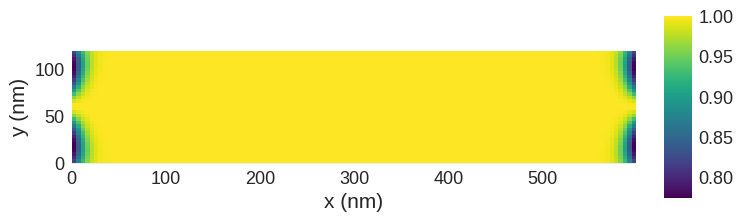

In [46]:
mm.Reset()
mm.Msat = 1000e3
mm.Aex = 10e-12

lex = np.sqrt(10e-12 / (.5 * mm.Mu0 * 1000e3 ** 2))
d = 30 * lex
Sizex = 5*d
Sizey = 1*d
Sizez = .1*d

nx = 2 ** mm.ilogb(Sizex / (.75 * lex))
ny = 2 ** mm.ilogb(Sizey / (.75 * lex))

mm.SetGridSize(nx, ny, 1)
mm.SetCellSize(Sizex/nx, Sizey/ny, Sizez)

mm.m = mm.Uniform(1, .1, 0)
mm.Relax()

print("<m> for d/lex = 30: ", mm.m.Average())

magnetisation = mm.DiscretisedField(mm.m)
magnetisation.sel('z').x.mpl()

### Hysteresis 

// Initializing geometry 3 %
// Initializing geometry 100 %
//resizing...
//resizing...


2024/01/30 20:27:37 //Using cached kernel: /tmp/mumax3kernel_[128 32 1]_[0 0 0]_[4e-09 4e-09 3e-08]_6_


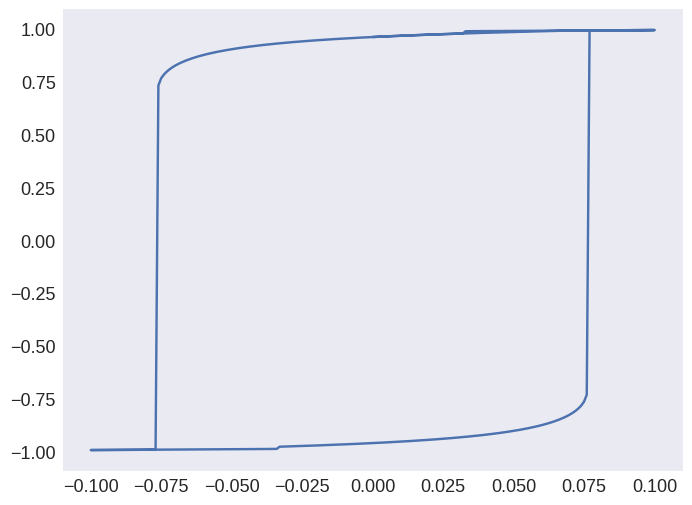

In [29]:
mm.Reset()
mm.SetGridSize(128, 32, 1)
mm.SetCellSize(4e-9, 4e-9, 30e-9)

mm.Msat = 800e3
mm.Aex = 13e-12

mm.m = mm.RandomMag()
mm.Relax()

Bmax = 100e-3
Bstep = 1e-3
mm.MinimizerStop = 1e-6

extra = .1 * Bstep #add extra bit to include last as well in np.arange
B_x = np.hstack([np.arange(0, Bmax+extra, Bstep), 
                 np.arange(Bmax, -Bmax-extra, -Bstep), 
                 np.arange(-Bmax, Bmax+extra, Bstep)])
m_x = np.zeros_like(B_x)

for i, B in enumerate(B_x):
    mm.B_ext = [B, 0, 0]
    mm.Minimize()
    m_x[i] = mm.m.Average()[0]

plt.plot(B_x, m_x)


### Geometry

//resizing...
// Initializing geometry 0 %
// Initializing geometry 100 %
//resizing...
// Initializing geometry 86 %
// Initializing geometry 100 %
// Initializing geometry 79 %
// Initializing geometry 100 %


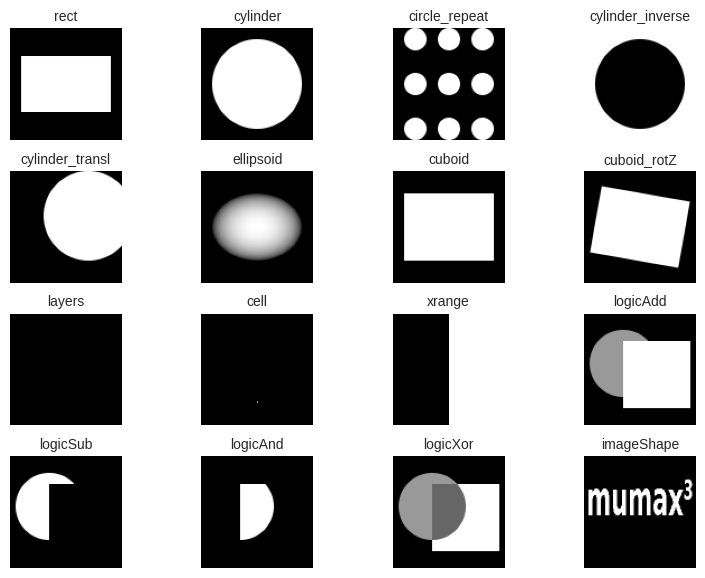

In [9]:
mm.SetGridSize(100, 100, 50)
mm.SetCellSize(1e-6/100, 1e-6/100, 1e-6/50)

mm.EdgeSmooth = 8


fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)
fig.tight_layout(h_pad=1)
plt.setp(ax, xticks=[], yticks=[])
imagedata = mm.NewSlice(1, 100, 100, 50)

i = 0
def show(title):
    global i
    mm.geom.EvalTo(imagedata)
    x = int(i/4)
    y = i%4
    ax[x, y].imshow(np.sum(imagedata[0], axis=-1).T, cmap="gray", origin="lower")
    ax[x, y].set_title(title, size=10)
    i += 1

mm.SetGeom(mm.Rect(800e-9, 500e-9))
show("rect")

mm.SetGeom(mm.Cylinder(800e-9, np.inf))
show("cylinder")

mm.SetGeom(mm.Circle(200e-9).Repeat(300e-9, 400e-9, 0))
show("circle_repeat")

mm.SetGeom(mm.Cylinder(800e-9, np.inf).Inverse())
show("cylinder_inverse")

mm.SetGeom(mm.Cylinder(800e-9, 600e-9).Transl(200e-9, 100e-9, 0))
show("cylinder_transl")

mm.SetGeom(mm.Ellipsoid(800e-9, 600e-9, 500e-9))
show("ellipsoid")

mm.SetGeom(mm.Cuboid(800e-9, 600e-9, 500e-9))
show("cuboid")

mm.SetGeom(mm.Cuboid(800e-9, 600e-9, 500e-9).RotZ(-10*np.pi/180))
show("cuboid_rotZ")

mm.SetGeom(mm.Layers(0, 25))
show("layers")

mm.SetGeom(mm.Cell(50, 20, 0))
show("cell")

mm.SetGeom(mm.XRange(0, np.inf))
show("xrange")

a = mm.Cylinder(600e-9, 600e-9).Transl(-150e-9, 50e-9, 0)
b = mm.Rect(600e-9, 600e-9).Transl(150e-9, -50e-9, 0)

mm.SetGeom(a.Add(b))
show("logicAdd")

mm.SetGeom(a.Sub(b))
show("logicSub")

mm.SetGeom(a.Intersect(b))
show("logicAnd")

mm.SetGeom(a.Xor(b))
show("logicXor")

mm.SetGeom(mm.ImageShape("mask.png"))
show("imageShape")


### Initial Magnetisation

// Initializing geometry 0 %
// Initializing geometry 100 %
//resizing...
//resizing...


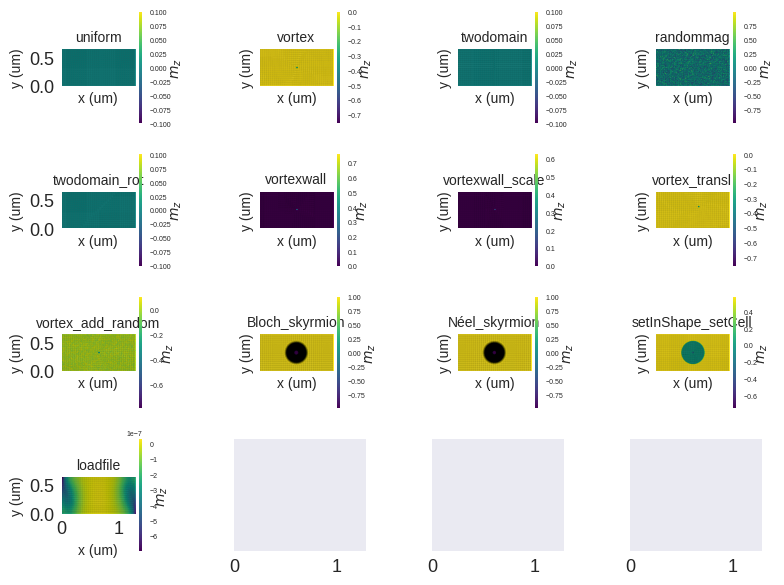

In [13]:
mm.SetGeom(mm.Universe()) 
mm.Reset()
mm.SetGridSize(256, 128, 50)
mm.SetCellSize(5e-9, 5e-9, 5e-9)

fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)
fig.tight_layout(h_pad=1, w_pad=3)

i = 0
def show(title):
    global i
    magnetisation = mm.DiscretisedField(mm.m)

    x = int(i/4)
    y = i%4
    magnetisation.sel('z').mpl(ax=ax[x, y])
    ax[x, y].set_title(title, size=10)
    ax[x, y].set_xlabel(ax[x, y].get_xlabel(), fontsize=10)
    ax[x, y].set_ylabel(ax[x, y].get_ylabel(), fontsize=10)
    cbar = ax[x, y].images[0].colorbar
    cbar.set_label("$m_z$", fontsize=10, labelpad=-1)
    cbar.ax.tick_params(labelsize=5)
    cbar.ax.yaxis.get_offset_text().set_fontsize(5)
    i += 1

mm.m = mm.Uniform(1, 1, 0)
show("uniform")

mm.m = mm.Vortex(1, -1)
show("vortex")

mm.m = mm.TwoDomain(1,0,0,  0,1,0,  -1,0,0)
show("twodomain")

mm.m = mm.RandomMag()
show("randommag")

mm.m = mm.TwoDomain(1,0,0,  0,1,0,  -1,0,0).RotZ(-np.pi/4)
show("twodomain_rot")

mm.m = mm.VortexWall(1, -1, 1, 1) 
show("vortexwall")

mm.m = mm.VortexWall(1, -1, 1, 1).Scale(1/2, 1, 1)
show("vortexwall_scale")

mm.m = mm.Vortex(1,-1).Transl(100e-9, 50e-9, 0)
show("vortex_transl")

mm.m = mm.Vortex(1,-1).Add(0.1, mm.RandomMag())
show("vortex_add_random")

mm.m = mm.BlochSkyrmion(1, -1).Scale(3,3,1)
show("Bloch_skyrmion")

mm.m = mm.NeelSkyrmion(1,-1).Scale(3,3,1)
show("Néel_skyrmion")

# set m in only a part of space, or a single cell:
mm.m = mm.Uniform(1, 1, 1)
mm.m.SetInShape(mm.Cylinder(400e-9, 100e-9), mm.Vortex(1, -1))
mm.m.SetCell(20, 10, 0, mm.Vector(0.1, 0.1, -0.9)) # set in cell index  [20,10,0]
show("setInShape_setCell")

#//Read m form .ovf file.
mm.m.LoadFile("myfile.ovf")
show("loadfile")



### Interlude: Rotating Cheese

// Initializing geometry 0 %
// Initializing geometry 100 %
//resizing...
//resizing...


2024/01/30 20:31:50 //Using cached kernel: /tmp/mumax3kernel_[128 128 1]_[0 0 0]_[2e-09 2e-09 2e-09]_6_


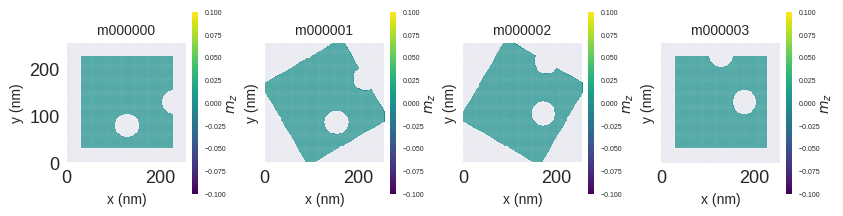

In [31]:
fig, ax = plt.subplots(1, 4, sharex=True, sharey=True)
fig.tight_layout(h_pad=1, w_pad=3)

j = 0
def show():
    global j
    magnetisation = mm.DiscretisedField(mm.m)

    #magnetisation.plane('z', n=(12, 12)).mpl(ax=ax[j])
    magnetisation.sel('z').z.mpl.scalar(ax=ax[j], filter_field=magnetisation.sel('z').norm)
    magnetisation.sel('z').mpl.vector(ax=ax[j], use_color=False, color="white")

    ax[j].set_title("m00000" + str(j), size=10)
    ax[j].set_xlabel(ax[j].get_xlabel(), fontsize=10)
    ax[j].set_ylabel(ax[j].get_ylabel(), fontsize=10)
    cbar = ax[j].images[0].colorbar
    cbar.set_label("$m_z$", fontsize=10, labelpad=-1)
    cbar.ax.tick_params(labelsize=5)
    cbar.ax.yaxis.get_offset_text().set_fontsize(5)
    j += 1

mm.Reset()
mm.SetGridSize(128, 128, 1)
mm.SetCellSize(2e-9, 2e-9, 2e-9)

d = 200e-9
sq = mm.Rect(d, d) 					 # square with side d

h = 50e-9
hole = mm.Cylinder(h, h)             # circle with diameter h
hole1 = hole.Transl(100e-9, 0, 0)   # translated circle #1
hole2 = hole.Transl(0, -50e-9, 0)   # translated cricle #2
cheese = sq.Sub(hole1).Sub(hole2)    # subtract the circles from the square (makes holes).
mm.SetGeom(cheese)

mm.Msat = 600e3
mm.Aex = 12e-13
mm.Alpha = 3

# rotate the cheese.
for i in range(0, 91, 30):
	angle = i*np.pi/180
	mm.SetGeom(cheese.RotZ(angle))
	mm.m = mm.Uniform(np.cos(angle), np.sin(angle), 0)
	mm.Minimize()
	show()

### Regions: Space-dependent Parameters

In [36]:
field = mm.DiscretisedField(mm.regions)

In [42]:
field.array.shape

(128, 128, 1, 1)

// Initializing geometry 0 %
// Initializing geometry 100 %
//resizing...
//resizing...


2024/01/30 20:37:08 //Using cached kernel: /tmp/mumax3kernel_[128 128 1]_[0 0 0]_[4e-09 4e-09 4e-09]_6_


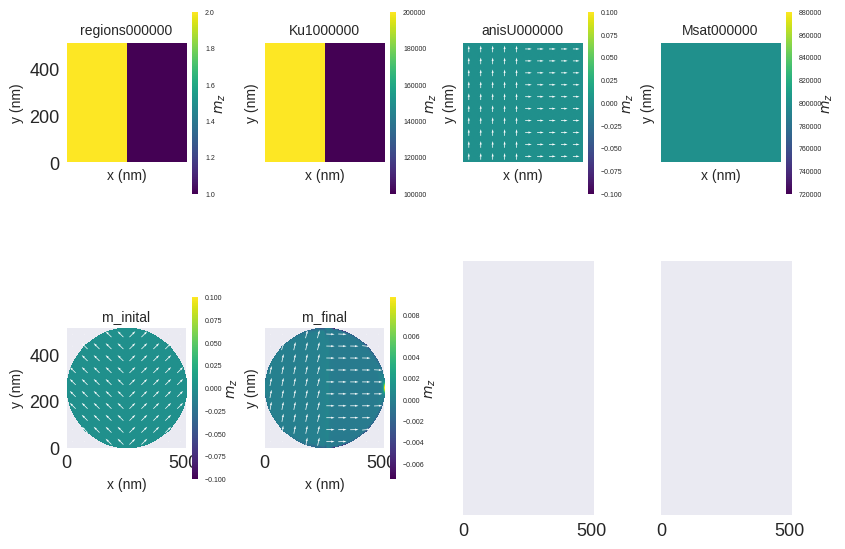

In [45]:
fig, ax = plt.subplots(2, 4, sharex=True, sharey=True)
fig.tight_layout(h_pad=1, w_pad=3)

j = 0
def show(q, title):
    global j
    x = int(j/4)
    y = j%4
    field = mm.DiscretisedField(q)

    if field.array.shape[-1] == 3:
        field.sel('z').z.mpl.scalar(ax=ax[x, y], filter_field=field.sel('z').norm)
        field.sel('z').resample(n=(10, 10)).mpl.vector(ax=ax[x, y], use_color=False, color="white")
    else:
        field.sel('z').mpl.scalar(ax=ax[x, y], filter_field=field.sel('z').norm)

    ax[x, y].set_title(title, size=10)
    ax[x, y].set_xlabel(ax[x, y].get_xlabel(), fontsize=10)
    ax[x, y].set_ylabel(ax[x, y].get_ylabel(), fontsize=10)
    cbar = ax[x, y].images[0].colorbar
    cbar.set_label("$m_z$", fontsize=10, labelpad=-1)
    cbar.ax.tick_params(labelsize=5)
    cbar.ax.yaxis.get_offset_text().set_fontsize(5)
    j += 1

mm.Reset()

N = 128
mm.SetGridSize(N, N, 1)
c = 4e-9
mm.SetCellSize(c, c, c)

# disk with different anisotropy in left and right half
mm.SetGeom(mm.Circle(N*c))
mm.DefRegion(1, mm.XRange(0, np.inf))  # left half
mm.DefRegion(2, mm.XRange(-np.inf, 0)) # right half
show(mm.regions, "regions000000")

mm.Ku1.SetRegion(1, .1e6)
mm.anisU.SetRegion(1, mm.Vector(1, 0, 0))

mm.Ku1.SetRegion(2, .2e6)
mm.anisU.SetRegion(2, mm.Vector(0, 1, 0))

show(mm.Ku1, "Ku1000000")
show(mm.anisU, "anisU000000")

mm.Msat = 800e3 # sets it everywhere
show(mm.Msat, "Msat000000")

mm.Aex = 12e-13
mm.alpha = 1

mm.m.SetRegion(1, mm.Uniform(1, 1, 0))
mm.m.SetRegion(2, mm.Uniform(-1, 1, 0))
show(mm.m, "m_inital")
mm.Run(.1e-9)
show(mm.m, "m_final")

### Slicing and Dicing Output

// Initializing geometry 0 %
// Initializing geometry 100 %
//resizing...
//resizing...


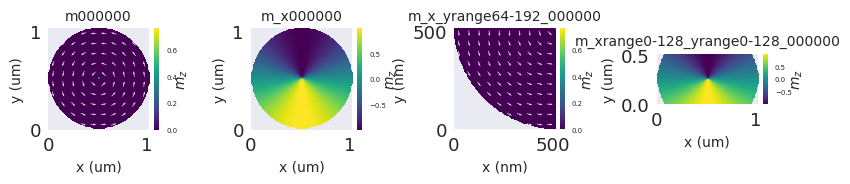

In [6]:
fig, ax = plt.subplots(1, 4)
fig.tight_layout(h_pad=1, w_pad=3)

j = 0
def show(q, title):
    global j
    field = mm.DiscretisedField(q)

    if field.dim == 3:
        field.plane('z').z.mpl.scalar(ax=ax[j], filter_field=field.norm)
        field.plane('z', n=(10, 10)).mpl.vector(ax=ax[j], use_color=False, color="white")
    else:
        field.plane('z').mpl.scalar(ax=ax[j], filter_field=field.norm)

    ax[j].set_title(title, size=10)
    ax[j].set_xlabel(ax[j].get_xlabel(), fontsize=10)
    ax[j].set_ylabel(ax[j].get_ylabel(), fontsize=10)
    cbar = ax[j].images[0].colorbar
    cbar.set_label("$m_z$", fontsize=10, labelpad=-1)
    cbar.ax.tick_params(labelsize=5)
    cbar.ax.yaxis.get_offset_text().set_fontsize(5)
    j += 1

mm.SetGeom(mm.Universe())
mm.ResetRegions()

Nx = 256
Ny = 256
Nz = 1
mm.SetGridSize(Ny, Nx, Nz)
c = 4e-9
mm.SetCellSize(c, c, c)
mm.SetGeom(mm.Circle(Nx*c))

mm.Msat  = 800e3 
mm.Aex   = 12e-13
mm.alpha = 1
mm.m = mm.Vortex(1, 1)

show(mm.m, "m000000")
show(mm.m.Comp(0), "m_x000000")
show(mm.Crop(mm.m, 0, int(Nx/2), 0, int(Ny/2), 0, int(Nz)), "m_x_yrange64-192_000000")

mx = mm.m.Comp(0)
mx_center = mm.CropY(mx, int(Ny/4), int(3*Ny/4))
show(mx_center, "m_xrange0-128_yrange0-128_000000")

### Magnetic Force Microscopy

// Initializing geometry 0 %
// Initializing geometry 100 %


2023/08/26 00:20:29 //Using cached kernel: /tmp/mumax3kernel_[256 256 1]_[0 0 0]_[2e-09 2e-09 1e-09]_6_
2023/08/26 00:20:41 //Using cached kernel: /tmp/mumax3MFMkernel_[256 256 1]_[0 0 0]_[2e-09 2e-09 1e-09]_1e-08_0.001_
2023/08/26 00:20:41 //Using cached kernel: /tmp/mumax3MFMkernel_[256 256 1]_[0 0 0]_[2e-09 2e-09 1e-09]_4e-08_0.001_


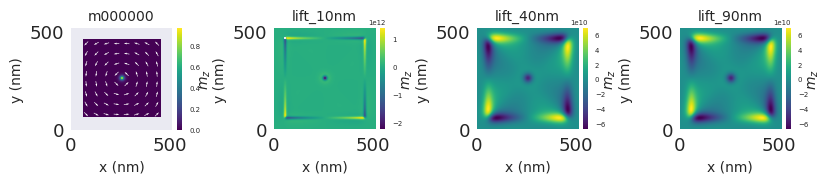

In [2]:
fig, ax = plt.subplots(1, 4)
fig.tight_layout(h_pad=1, w_pad=3)

j = 0
def show(q, title):
    global j
    field = mm.DiscretisedField(q)

    if field.dim == 3:
        field.plane('z').z.mpl.scalar(ax=ax[j], filter_field=field.norm)
        field.plane('z', n=(10, 10)).mpl.vector(ax=ax[j], use_color=False, color="white")
    else:
        field.plane('z').mpl.scalar(ax=ax[j], filter_field=field.norm)

    ax[j].set_title(title, size=10)
    ax[j].set_xlabel(ax[j].get_xlabel(), fontsize=10)
    ax[j].set_ylabel(ax[j].get_ylabel(), fontsize=10)
    cbar = ax[j].images[0].colorbar
    cbar.set_label("$m_z$", fontsize=10, labelpad=-1)
    cbar.ax.tick_params(labelsize=5)
    cbar.ax.yaxis.get_offset_text().set_fontsize(5)
    j += 1

mm.Reset()
mm.SetGridSize(256, 256, 1)
mm.SetCellSize(2e-9, 2e-9, 1e-9)
mm.SetGeom(mm.Rect(400e-9, 400e-9))

mm.Msat    = 600e3
mm.Aex     = 10e-12
mm.m       = mm.Vortex(1, 1)

mm.Relax()
show(mm.m, "m000000")

mm.MFMLift = 10e-9
show(mm.MFM, "lift_10nm")

mm.MFMLift = 40e-9
show(mm.MFM, "lift_40nm")

MFMLift = 90e-9
show(mm.MFM, "lift_90nm")

### PMA Racetrack

In [4]:
mm.m = mm.RandomMag()

// Initializing geometry 0 %
// Initializing geometry 100 %
//resizing...
//resizing...


2023/08/26 00:34:47 //Using cached kernel: /tmp/mumax3kernel_[128 128 1]_[0 0 0]_[2e-09 2e-09 1e-09]_6_


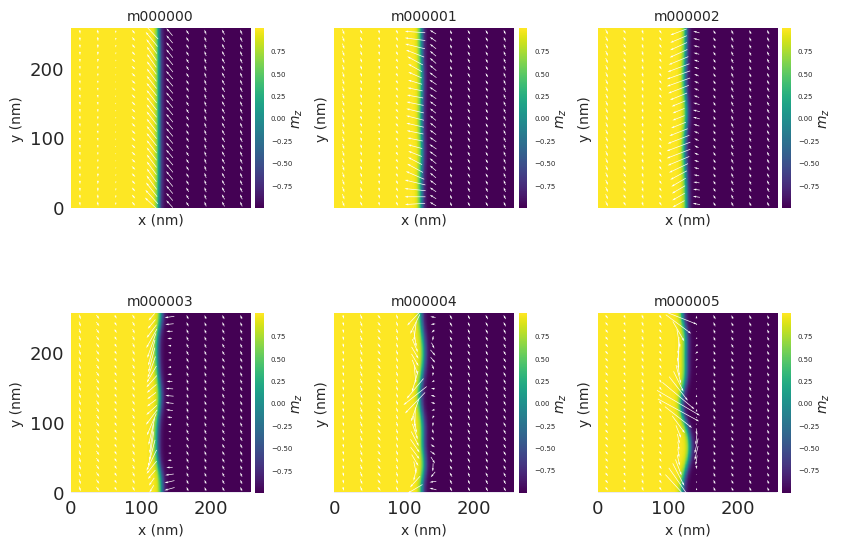

In [4]:
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
fig.tight_layout(h_pad=1, w_pad=3)

j = 0
def show():
    global j
    x = int(j/3)
    y = j%3
    field = mm.DiscretisedField(mm.m)

    field.plane('z').z.mpl.scalar(ax=ax[x, y], filter_field=field.norm)
    field.plane('z', n=(10, 25)).mpl.vector(ax=ax[x, y], use_color=False, color="white")

    ax[x, y].set_title("m00000" + str(j), size=10)
    ax[x, y].set_xlabel(ax[x, y].get_xlabel(), fontsize=10)
    ax[x, y].set_ylabel(ax[x, y].get_ylabel(), fontsize=10)
    cbar = ax[x, y].images[0].colorbar
    cbar.set_label("$m_z$", fontsize=10, labelpad=-1)
    cbar.ax.tick_params(labelsize=5)
    cbar.ax.yaxis.get_offset_text().set_fontsize(5)
    j += 1

mm.Reset()
mm.SetGridSize(128, 128, 1)
mm.SetCellSize(2e-9, 2e-9, 1e-9)

mm.Msat    = 600e3
mm.Aex     = 10e-12
mm.anisU   = mm.Vector(0, 0, 1)
mm.Ku1     = 0.59e6
mm.alpha   = 0.02 
mm.Xi      = 0.2

mm.m     = mm.TwoDomain(0, 0, 1, 1, 1, 0, 0, 0, -1) # up-down domains with wall between Bloch and Néél type
mm.Relax()

#Set post-step function that centers simulation window on domain wall.
mm.ext_centerWall(2) # keep m[2] (= m_z) close to zero

mm.J   = mm.Vector(1.5e13, 0, 0)
mm.Pol = 1

# Schedule output (we replace autosave, which is slightly different. Saves at exact time)
for i in range(0, 6):
    mm.Run(100e-12)
    show()


### Voronoi Tesselation

In this example we use regions to specify grains in a material. The built-in extension ext_makegrains is used to define grain-like regions using Voronoi tessellation. We vary the material parameters in each grain.

// Initializing geometry 0 %
// Initializing geometry 100 %


2023/08/26 00:37:34 //Using cached kernel: /tmp/mumax3kernel_[256 256 1]_[0 0 0]_[4e-09 4e-09 4e-08]_6_


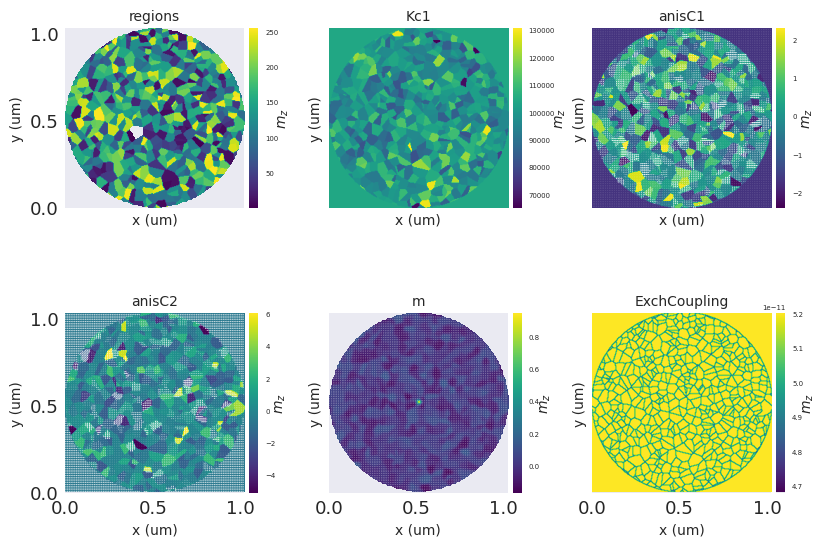

In [2]:
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
fig.tight_layout(h_pad=1, w_pad=3)

j = 0
def show(q, title):
    global j
    x = int(j/3)
    y = j%3
    field = mm.DiscretisedField(q)

    if field.dim == 3:
        field.plane('z').z.mpl.scalar(ax=ax[x, y], filter_field=field.norm)
        field.plane('z', n=(100, 100)).mpl.vector(ax=ax[x, y], use_color=False, color="white")
    else:
        field.plane('z').mpl.scalar(ax=ax[x, y], filter_field=field.norm)

    ax[x, y].set_title(title, size=10)
    ax[x, y].set_xlabel(ax[x, y].get_xlabel(), fontsize=10)
    ax[x, y].set_ylabel(ax[x, y].get_ylabel(), fontsize=10)
    cbar = ax[x, y].images[0].colorbar
    cbar.set_label("$m_z$", fontsize=10, labelpad=-1)
    cbar.ax.tick_params(labelsize=5)
    cbar.ax.yaxis.get_offset_text().set_fontsize(5)
    j += 1


N = 256
c = 4e-9
d = 40e-9
mm.Reset()
mm.SetGridSize(N, N, 1)
mm.SetCellSize(c, c, d)

mm.SetGeom(mm.Circle(N*c))

# define grains with region number 0-255
grainSize  = 40e-9
randomSeed = 1234567
maxRegion  = 255
mm.ext_makegrains(grainSize, maxRegion, randomSeed)

mm.DefRegion(256, mm.Circle(N*c).Inverse()) # region 256 is outside, not really needed

mm.alpha = 3
mm.Kc1   = 1000
mm.Aex   = 13e-12
mm.Msat  = 860e3

# set random parameters per region
for i in range(maxRegion):
    # random cubic anisotropy direction
	axis1  = [mm.randNorm(), mm.randNorm(), mm.randNorm()]
	helper = [mm.randNorm(), mm.randNorm(), mm.randNorm()]
	axis2  = np.cross(axis1, helper)  # perpendicular to axis1
	mm.anisC1.SetRegion(i, axis1)     # axes need not be normalized
	mm.anisC2.SetRegion(i, axis2)

	# random 10% anisotropy variation
	K = 1e5
	mm.Kc1.SetRegion(i, K + mm.randNorm() * 0.1 * K)


# reduce exchange coupling between grains by 10%
for i in range(maxRegion):
	for i_ in range(i+1, maxRegion):
		mm.ext_ScaleExchange(i, i_, 0.9)


mm.m = mm.Vortex(1, 1)
mm.Run(.1e-9)

show(mm.regions, "regions")
show(mm.Kc1, "Kc1")
show(mm.anisC1, "anisC1")
show(mm.anisC2, "anisC2")
show(mm.m, "m")
show(mm.ExchCoupling, "ExchCoupling")

### RKKY

Scaling the exchange coupling between regions can be used to obtain antiferromagnetic coupling like the RKKY interaction. In that case we only model the magnetic layers and do not explicitly add a spacer layer (which is negligibly thin). We scale the exchange coupling to get the desired RKKY strength: `scale = (RKKY * cellsize_z) / (2 * Aex)`.

// Initializing geometry 5 %
// Initializing geometry 100 %
//resizing...
//resizing...


2023/08/26 15:30:10 //Using cached kernel: /tmp/mumax3kernel_[10 10 2]_[0 0 0]_[1e-09 1e-09 1e-09]_6_
/tmp/ipykernel_24511/34981713.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


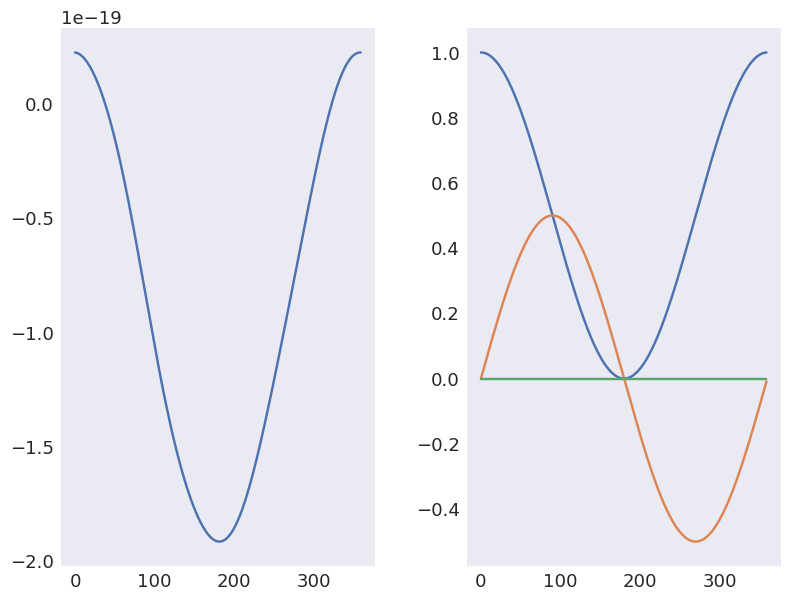

In [12]:
mm.Reset()

N = 10
mm.SetGridSize(N, N, 2)

c = 1e-9
mm.SetCellSize(c, c, c)

mm.DefRegion(0, mm.Layer(0))
mm.DefRegion(1, mm.Layer(1))

mm.Msat = 1e6

mm.Aex  = 10e-12
RKKY = -1e-3 # 1mJ/m2
scale = (RKKY * c) / (2 * mm.Aex.Average())
mm.ext_ScaleExchange(0, 1, scale)

mm.m.SetRegion(0, mm.Uniform(1, 0, 0))

angle = np.arange(0, 360)
mags = np.zeros((360, 3))
energies = np.zeros(360)

for i, ang in enumerate(angle):
	mm.m.SetRegion(1, mm.Uniform(np.cos(np.deg2rad(ang)), np.sin(np.deg2rad(ang)), 0))
	mags[i] = mm.m.Average()
	energies[i] = mm.E_total.Get()

fig, ax = plt.subplots(1, 2)
fig.tight_layout(h_pad=1, w_pad=3)
ax[0].plot(angle, energies)
ax[1].plot(angle, mags);